# Exploratory Data Analysis (EDA) Tutorial

## Introduction

### Meaning of Exploratory Data Analysis
In this tutorial, you'll learn how to use Pandas to perform the basic exploratory data analysis (EDA). EDA refers to any analysis done to understand the basic structure, characteristics, and quality of a dataset. This includes efforts to measure spread and center of numerical and categorical data, and efforts to identify outliers, misentered values, and missing values, as well as any basic investigation done to test basic assumptions about the data. Typically, EDA incorporates some amount of data visualization. 

### Purpose of EDA
Whether you’re compiling a database for a web application or training a deep learning model, EDA should be the first thing you do after data collection. Real datasets are almost never perfect. You’ll often find typos, misentered values, and chunks of missing data. And in most projects, some of your assumptions about how to interpret the values are probably incorrect. EDA allows you to identify these problems and incorrect assumptions early before you bake them into your model, application, or processing pipeline.

### EDA for the project
In this project, performing EDA will give you a sense of how much cleaning you’ll have to do to prepare the data for ingestion. It will also help you gauge how long basic operations on your data will take to execute. And it will reveal whether the contents of the dataset match your assumptions about how the data was collected and the fields were defined. 

All of this information will help you estimate how useful a dataset will be to your application and how difficult it will be to work with. Ultimately, this will inform whether you should commit to using a particular dataset or search for an alternative instead. Therefore, it’s essential that you perform some EDA before submitting your project proposal, so you’re not stuck with a bad dataset when it’s more difficult to change course later. 

### Tutorial Overview
This tutorial covers the EDA you'll need to perform when choosing datasets:

*  Data importation
*  Initial exploration
*  Missing value detection
*  Misentered value detection
*  Distribution examination

To edit and run the code throughout the tutorial, open the notebook in "playground mode" using the button in the upper right corner.

After going through the tutorial, try the accompanying exercises to practice what you learned. 

In [0]:
import pandas as pd
import numpy as np


## Data importation


For this example, we'll work with a [subset of U.S. census data](https://archive.ics.uci.edu/ml/datasets/Adult) maintained by the UCI Machine Learning Repository. [The Repository](https://archive.ics.uci.edu/ml/index.php) contains many other free, easily downloadable datasets that might be useful for your project , so be sure to check it out when you're searching for datasets later on!

To import the data, first copy the dataset into your Drive by following [this link](https://drive.google.com/open?id=1WB60Q6VJYyjbE8h8WED2mfi8Ae8LzoRU) and clicking on the "Add shortcut to Drive" link in the upper-right corner. Remember where your store it in your drive. 


Next, mount your Google Drive to the notebook by running the code cell below. This will allow you to import any files in your drive to the Python Runtime Environment that the notebook is using. When you run the code cell, Google Drive may ask you to re-login to your account and paste a verification code into a popup below the cell.


In [0]:
prefix = '/content/drive'
from google.colab import drive
drive.mount(prefix, force_remount=True)

Mounted at /content/drive


Now, you should see a directory named "drive" when you click the Files icon on the left. Expand this directory and navigate to the location you saved the census data. Control-click (right-click for PC) on the file and select "copy path". Then, paste the path into `file_path` variable in the cell below and run the cell. 

In [0]:
file_path = # YOUR PATH TO THE CENSUS SUBSET HERE e.g. '/content/drive/My Drive/CIS550/adult.data'

The dataset is stored as a CSV, so we'll load it into a `DataFrame` using `pandas.read_csv` in the code cell below. `Pandas` also defines a number of other [IO functions](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) that load the contents of common file types directly into `DataFrames`.

In [0]:
census = pd.read_csv(file_path)
census.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Initial Exploration
Before thinking about cleaning, outlier detection, or anything else, we need to have a basic sense of what the dataset contains. The dataframe object defines a number of functions and properties that serve this purpose:


*   **DataFrame.shape**: Property that gives the gives the number of rows and columns in the DataFrame
*   **DataFrame.size**: Property that gives the total number of elements in the DataFrame
*   **DataFrame.columns**: Property that gives names of the DataFrame's columns
*   **DataFrame.dtypes**: Property that gives the data type of each column
*   **DataFrame.head()/.tail()**: Function that returns the first/last few rows of the DataFrame
*   **DataFrame.memory_usage()**: Function that returns the memory usage for each column of the DataFrame in bytes

Let's take a closer look at our DataFrame using `DataFrame.head()` first. 

In [0]:
census.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### Fixing Column Names
The index looks fine, but the column names don't look correct. The names appear to match the contents of columns in many cases. As a result, we can conclude that `pandas.read_csv` expected the first row of the `.data` file to be a list of labels, but it turned out to be the first data point. 

[The documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) for `pandas.read_csv` indicates how we can override this default behavior. According to the documentation, we can set `header` to `None` and pass a list of column names to the `names` argument to treat the first row as a row of data, rather than column names. Let's do that in the chunk below, then re-run `DataFrame.head` to make sure it worked as we expect. 

In [0]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'maritial-status',
             'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
             'hours-per-week', 'native-country', 'income']  # names taken from the UCI ML Repo homepage for the data
census = pd.read_csv(file_path, header=None, names=col_names)
census.head()

,age,workclass,fnlwgt,education,education-num,maritial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Now, we have meaningful column names. And as a sanity check, you can ensure that the first row of the data in our new dataframe matches the column names in the old dataframe, so you know we didn't accidently throw out the first row.


### Early Data Interpretation
Let's use the output of `census.head()` to draw conclusions and characterize our uncertainties about how to interpret each column. 


The intended meanings of many of the columns are easy to infer: `age`, `education`, `maritial-status`, `relationship`, `race`, `sex`, `hours-per-week`, and `native-country`. But the meanings of a few columns (like `fnlwgt`, `education-num`, `capital-gain`, and `capital-loss`) aren't immediately obvious.

And at this stage, we should have many unanswered questions related to interpretation. For example:  
*   How many possible values can each categorical variable take on? How should we interpret each of these?
*   Are `education` and `education-num` redundant? 
*   Can a person have non-zero `capital-gain` and non-zero `capital-loss` simultaneously? What would this mean?

### Dataset Size Measurement

Let's use a couple of the other functions we discussed above to get a better sense of how large the dataset and what it contains. 

In [0]:
census.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
education-num       int64
maritial-status    object
occupation         object
relationship       object
race               object
sex                object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [0]:
census.shape  # (first number counts rows)

(32561, 15)

In [0]:
usage_by_col = census.memory_usage(deep=True) # returns memory usage for each column
total_usage = usage_by_col.sum()
mbs = total_usage / 1e6 # convert to megabytes 
mbs

21.141576

The outputs of the above commands tell us that the dataframe consists of about 33 thousand rows, 9 string columns, and 6 integer columns. 

We also now know that the `DataFrame` occupies about 21 megabtyes of RAM. To put this number in context, have a look at the RAM usage in the upper right corner. We have a lot of unused RAM capacity (about 12 GBs), so we know we can continue to work with this dataset without risk of crashing our environment.  

## Missing Value Detection
Now, let's find out which (if any) rows and columns contain missing values. 

Typically in a `DataFrame`, `np.NaN` represents a missing value. We will use the following two functions in combination to find out which columns have missing values: 
*   **`DataFrame.isna()`**: Returns a `DataFrame` where every value is a boolean that represents whether the value was `np.NaN` in the input `DataFrame`
*   **`DataFrame.any()`**: Returns a `Series` that indicates whether each column contained at least one `True` boolean. 

In [0]:
census.isnull().any()

age                False
workclass          False
fnlwgt             False
education          False
education-num      False
maritial-status    False
occupation         False
relationship       False
race               False
sex                False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool

This suggests there are no missing values. But we assumed that the dataset doesn't use a placeholder value for missing values in the text column. Let's check this assumption by printing the unique values for each text column:

In [0]:
for col in census.columns:  # iterate over all columns
  if census[col].dtype not in [np.int64, np.float64]:  # ignore integer and float columns
    # print a header, all unique values, and a separator
    print('Unique Values for {}'.format(col))  
    print(census[col].unique())   
    print('')

Unique Values: workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

Unique Values: education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Unique Values: maritial-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

Unique Values: occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

Unique Values: relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

Unique Values: race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' 

An inspection of the unique values for each column indicates `workclass`, `occupation`, and `native-country` all contain at least one " ?". Since there's no question mark country, this is probably the missing value placeholder we were looking for. 

Let's find out what portion of values are missing from each of those affected columns.  

In [0]:
missing = census[['native-country', 'workclass', 'occupation']].copy()  # subset columns
# Redefine each column as a boolean indicating whether the original value was `?`
for col in missing.columns:
  missing[col] = missing[col] == " ?"
missing.sum()  # counts the number of 'True' values in each column (Treats True as 1, False as 0)

native-country     583
workclass         1836
occupation        1843
dtype: int64

In the worst case, this means 4262 of 32k rows have at least one missing value. Let's find out exactly how many rows are affected.

By passing `axis='columns'` to `DataFrame.any()`, we check whether each row contains at least 1 `True` value, then we can count the rows with true values using `Series.sum`:

In [0]:
missing.any(axis='columns').sum()

2399

As a fraction of all rows:

In [0]:
(missing.any(axis='columns').sum()) / missing.shape[0]

0.07367709836921471

If you were considering using this dataset for your project, you would want to think about whether and how your application could tolerate this amount of missing data. 

Depending on your application, you may want throw out the rows with missing values, use some placeholder value, or abandon the dataset altogether. 

## Misentered Value Detection

Now, let's see if the dataset contains any obviously misentered values. 

The unique values of the text data we printed above suggest there aren't any misentered text values. But we still need to investigate the numeric columns. Lets use the `DataFrame.max()` and `DataFrame.min()` functions to check for any obviously implausible values. 

In [0]:
census.max()

age                               90
workclass                Without-pay
fnlwgt                       1484705
education               Some-college
education-num                     16
maritial-status              Widowed
occupation          Transport-moving
relationship                    Wife
race                           White
sex                             Male
capital-gain                   99999
capital-loss                    4356
hours-per-week                    99
native-country            Yugoslavia
income                          >50K
dtype: object

In [0]:
census.min()

age                                 17
workclass                            ?
fnlwgt                           12285
education                         10th
education-num                        1
maritial-status               Divorced
occupation                           ?
relationship                   Husband
race                Amer-Indian-Eskimo
sex                             Female
capital-gain                         0
capital-loss                         0
hours-per-week                       1
native-country                       ?
income                           <=50K
dtype: object

Nothing in the min and max outputs above indicates there are obviously misentered values. For example, we would have had a problem if the minimum age were less than 0 or the max were greater than 130. 

Even though we didn't find any misentered values, the min and max data still allow us to draw some new conclusions about some of the columns. For example: 
*   `education-num` is defined on range 1 to 16. This suggests it may be the number of years of school completed through undergrad. 
*   `capital-gain` and `capital-loss` are nonnegative, but we still don't know if they can be positive simulataneously. 


## Distribution Examination

Finally, let's take a closer look at the distributions of a couple features. 

##### Numerical Distributions
Pandas allows us to easily obtain summary statistics or generate plots to learn more about numerical distributions.

`DataFrame.describe()` and `Series.describe()` give a few useful statistics that summarize center and spread. For example:

In [0]:
census['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

We can also generate a histogram to visualize the shape of the distribution:

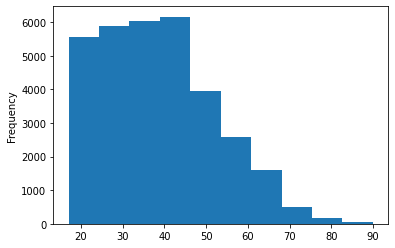

In [0]:
census['age'].plot(kind='hist')

Or a box plot to visualize spread and identify outliers:

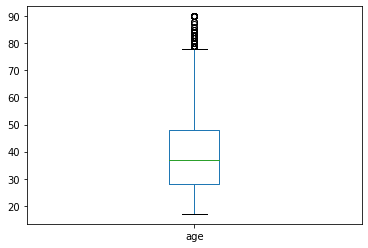

In [0]:
census['age'].plot(kind='box')

##### Categorical Distributions
We can learn more about the distribution of a categorical variable by generating a bar plot of category frequencies. For example: 

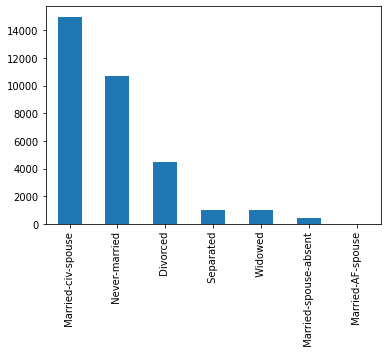

In [0]:
census['maritial-status'].value_counts().plot(kind='bar')

Or a pie plot:

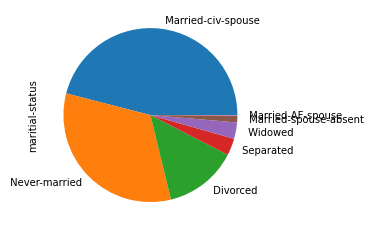

In [0]:
census['maritial-status'].value_counts().plot(kind='pie')

## Exercises
Check out [these exercises](https://drive.google.com/open?id=11K6Ivr4viUKCKblF64qG2kU1KNodnIxY) to practice the EDA techniques you learned above!